In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("banknotes.csv")

In [3]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Check the kind of outputs

In [4]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
import seaborn as sns

C:\Users\hp\Anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda1\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda1\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda1\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


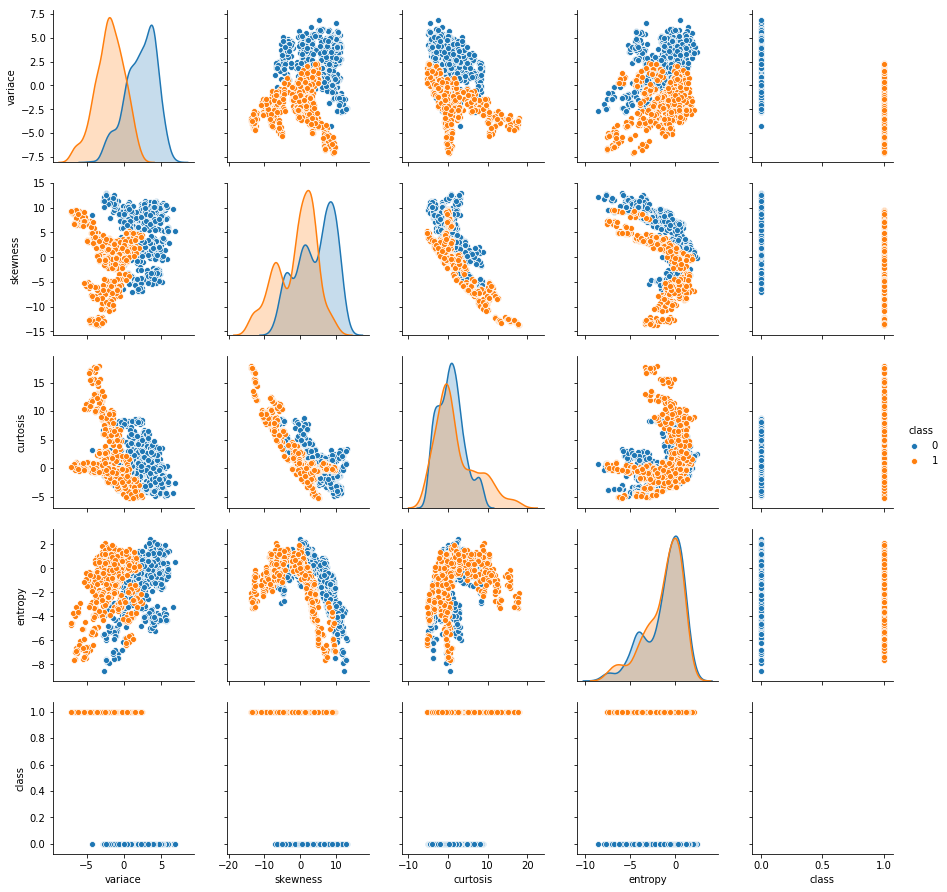

In [6]:
sns.pairplot(df,hue="class")

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale

## Scaling of Data

In [8]:
x=scale(df.drop('class',axis=1).values)
y=df['class'].values

In [9]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

## Implementing RandomForest

In [10]:
model=RandomForestClassifier()#U can set maximum features to be selevted by each decision tree
cross_val_score(model,x,y)##Finding cross validationScore

C:\Users\hp\Anaconda1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hp\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.98471616, 0.9868709 , 1.        ])

In [11]:
X_train, X_test,y_train,y_test=train_test_split(x,y)
model.fit(X_train,y_train)
print("Accuracy of RF classifier on trainingset: {:.5f}".format(model.score(X_train,y_train)))
print("Accuracy of RF classifier on testset: {:.5f}".format(model.score(X_test,y_test)))


C:\Users\hp\Anaconda1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of RF classifier on trainingset: 1.00000
Accuracy of RF classifier on testset: 0.99125


## Logistic Regression

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [14]:
K.clear_session()#Cleaning earlier models from  memory or u can even avoid doing dat
model2=Sequential()
model2.add(Dense(1,input_shape=(4,),activation='sigmoid'))
#model.add(Dense(#units in that layer ,input_shape=(# of features,),activation='sigmoid'))
model2.compile(loss="binary_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
#history=model2.fit(X_train,y_train)
history=model2.fit(X_train,y_train,epochs=10,validation_split=0.1)
#result=model2.evaluate(X_test,y_test)


Train on 864 samples, validate on 96 samples
Epoch 1/10
864/864 [==============================] - 4s 4ms/step - loss: 0.7367 - acc: 0.5891 - val_loss: 0.7457 - val_acc: 0.6250
Epoch 2/10
864/864 [==============================] - 0s 171us/step - loss: 0.6595 - acc: 0.6586 - val_loss: 0.6734 - val_acc: 0.6979
Epoch 3/10
864/864 [==============================] - 0s 151us/step - loss: 0.5963 - acc: 0.7095 - val_loss: 0.6137 - val_acc: 0.7292
Epoch 4/10
864/864 [==============================] - 0s 170us/step - loss: 0.5450 - acc: 0.7778 - val_loss: 0.5645 - val_acc: 0.7500
Epoch 5/10
864/864 [==============================] - 0s 158us/step - loss: 0.5033 - acc: 0.8148 - val_loss: 0.5240 - val_acc: 0.7500
Epoch 6/10
864/864 [==============================] - 0s 159us/step - loss: 0.4694 - acc: 0.8333 - val_loss: 0.4907 - val_acc: 0.7604
Epoch 7/10
864/864 [==============================] - 0s 164us/step - loss: 0.4417 - acc: 0.8576 - val_loss: 0.4631 - val_acc: 0.8542
Epoch 8/10
864/864 

In [15]:
historydf=pd.DataFrame(history.history, index=history.epoch)

## Learning rate after every epoch

NameError: name 'result' is not defined

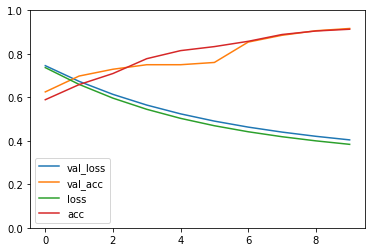

In [16]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy :{:3.1f}%".format(result[0]*100),fontsize=15)

## Testing at different learning rates

In [ ]:
dflist=[]
learning_rates=[0.01,0.05,0.1,0.5]
for lr in learning_rates:
    K.clear_session()
    model3=Sequential()
    model3.add(Dense(1,input_shape=(4,),activation='sigmoid'))
#model.add(Dense(#units in that layer ,input_shape=(# of features,),activation='sigmoid'))
    model3.compile(loss="binary_crossentropy",
              optimizer=SGD(lr=lr),
              metrics=["accuracy"])
#history=model2.fit(X_train,y_train)
    histor=model3.fit(X_train,y_train,batch_size=16,epochs=10,validation_split=0.1)##Min batch gradient
    dflist.append(pd.DataFrame(histor.history, index=histor.epoch))

In [ ]:
historydf=pd.concat(dflist, axis=1)

In [ ]:
historydf# Va;idation loss and accuracy after each epoch for all the different learning rates

## Displaying value for each learning rates

In [ ]:

metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([learning_rates,metrics_reported],
                              names=['learning_ratess','metric'])
historydf.columns=idx

In [ ]:
historydf

## Plot wrt learning rates

In [ ]:
fig = plt.figure(figsize=(8, 6)) 
ax=plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,  lw=2)
plt.grid(True)
plt.title("Loss")
ax=plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
#plt.tight_layout()

## Testing over different  Batch Sizes

## Min batch gradient descent

In [ ]:
dflist=[]
batch_sizes=[16,32,64,128]
for bs in batch_sizes:
    K.clear_session()
    model4=Sequential()
    model4.add(Dense(1,input_shape=(4,),activation='sigmoid'))
#model.add(Dense(#units in that layer ,input_shape=(# of features,),activation='sigmoid'))
    model4.compile(loss="binary_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])
#history=model2.fit(X_train,y_train)
    historyy=model4.fit(X_train,y_train,batch_size=bs,epochs=10,validation_split=0.1)
    dflist.append(pd.DataFrame(historyy.history, index=historyy.epoch))

In [ ]:
historyydf=pd.concat(dflist, axis=1)

In [ ]:
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([batch_sizes,metrics_reported],
                              names=['batch_sizes','metric'])
historyydf.columns=idx

In [ ]:
historyydf

In [ ]:
fig = plt.figure(figsize=(14, 8)) 
ax=plt.subplot(211)
historyydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,  lw=2)
plt.grid(True)
plt.title("Loss")
ax=plt.subplot(212)
historyydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
#plt.tight_layout()

In [39]:
from keras.optimizers import Adam,RMSprop

 ## Visualising inner layers

In [42]:
K.clear_session()
model5=Sequential()
model5.add(Dense(2,input_shape=(4,), activation='relu'))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(RMSprop(lr=0.01),
               loss='binary_crossentropy',
               metrics=['accuracy'])
#keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
h=model5.fit(X_train,y_train, batch_size=16, epochs=20, verbose=1,validation_split=0.1)
result=model5.evaluate(X_test,y_test)

Train on 864 samples, validate on 96 samples
Epoch 1/20
864/864 [==============================] - 1s 676us/step - loss: 0.7284 - acc: 0.5104 - val_loss: 0.6785 - val_acc: 0.5625
Epoch 2/20
864/864 [==============================] - 0s 300us/step - loss: 0.6211 - acc: 0.6238 - val_loss: 0.5583 - val_acc: 0.7604
Epoch 3/20
864/864 [==============================] - 0s 258us/step - loss: 0.4436 - acc: 0.8681 - val_loss: 0.3476 - val_acc: 0.9479
Epoch 4/20
864/864 [==============================] - 0s 315us/step - loss: 0.2740 - acc: 0.9688 - val_loss: 0.2178 - val_acc: 0.9792
Epoch 5/20
864/864 [==============================] - 0s 294us/step - loss: 0.1819 - acc: 0.9815 - val_loss: 0.1548 - val_acc: 0.9792
Epoch 6/20
864/864 [==============================] - 0s 346us/step - loss: 0.1287 - acc: 0.9861 - val_loss: 0.1115 - val_acc: 0.9792
Epoch 7/20
864/864 [==============================] - 0s 294us/step - loss: 0.0963 - acc: 0.9826 - val_loss: 0.0903 - val_acc: 0.9792
Epoch 8/20
864/86

In [43]:
result

[0.029823485364034338, 0.9878640776699029]

In [45]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [46]:
inp=model5.layers[0].input#Kitna input feature iske andar feed ho rhaa hai
out=model5.layers[0].output# Yeb khud kitne layer kaa hai

In [47]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [48]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [49]:
  features_function=K.function([inp],[out])

In [50]:
features_function

In [55]:
features=features_function([X_test])[0]

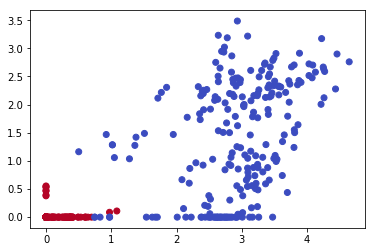

In [56]:
 plt.scatter(features[:,0],features[:,1], c=y_test, cmap='coolwarm')

In [69]:
K.clear_session()
model6=Sequential()
model6.add(Dense(3,input_shape=(4,), activation='relu'))
model6.add(Dense(2, activation='relu'))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(RMSprop(lr=0.01),
               loss='binary_crossentropy',
               metrics=['accuracy'])
#keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
h=model6.fit(X_train,y_train, batch_size=16, epochs=20, verbose=1,validation_split=0.1)
result=model6.evaluate(X_test,y_test)

Train on 864 samples, validate on 96 samples
Epoch 1/20
864/864 [==============================] - 1s 674us/step - loss: 0.5288 - acc: 0.8715 - val_loss: 0.3740 - val_acc: 0.9375
Epoch 2/20
864/864 [==============================] - 0s 289us/step - loss: 0.3068 - acc: 0.9549 - val_loss: 0.2215 - val_acc: 0.9792
Epoch 3/20
864/864 [==============================] - 0s 303us/step - loss: 0.1949 - acc: 0.9734 - val_loss: 0.1447 - val_acc: 0.9792
Epoch 4/20
864/864 [==============================] - 0s 288us/step - loss: 0.1302 - acc: 0.9826 - val_loss: 0.0996 - val_acc: 0.9792
Epoch 5/20
864/864 [==============================] - 0s 298us/step - loss: 0.0882 - acc: 0.9896 - val_loss: 0.0680 - val_acc: 1.0000
Epoch 6/20
864/864 [==============================] - 0s 288us/step - loss: 0.0630 - acc: 0.9919 - val_loss: 0.0495 - val_acc: 0.9792
Epoch 7/20
864/864 [==============================] - 0s 281us/step - loss: 0.0449 - acc: 0.9942 - val_loss: 0.0353 - val_acc: 1.0000
Epoch 8/20
864/86

In [70]:
result

[0.0035882846031844327, 1.0]

In [71]:
inp=model6.layers[0].input#layers[x], where x will be kon sa layer input le rhaa hai
out=model6.layers[1].output#layers[x], where x will be kon sa layer output de rhaa hai

In [72]:
inp#kitna input

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [73]:
out#kitna unit kaa khud bnaa huaa hai

<tf.Tensor 'dense_2/Relu:0' shape=(?, 2) dtype=float32>

412/412 [==============================] - 0s 80us/step
[[ 0.          0.        ]
 [ 0.04310596  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.776809    0.        ]
 [ 7.881466    0.        ]
 [ 0.          0.        ]
 [ 3.9132414   0.        ]
 [ 0.          0.        ]
 [ 5.032176    0.        ]
 [ 5.51667     0.        ]
 [ 5.827387    0.        ]
 [ 7.02265     0.        ]
 [ 1.8608791   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.0875564   0.        ]
 [ 0.          0.        ]
 [10.314645    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.9187937   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.81575     0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.891017    0.        ]
 [ 9.720668    0.        ]

412/412 [==============================] - 0s 85us/step
[[ 0.          0.        ]
 [ 0.33742765  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8506293   0.        ]
 [ 8.086667    0.        ]
 [ 0.          0.        ]
 [ 3.7690465   0.        ]
 [ 0.          0.        ]
 [ 5.2487545   0.        ]
 [ 5.56668     0.        ]
 [ 5.8957157   0.        ]
 [ 6.671276    0.        ]
 [ 1.8481739   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.059264    0.        ]
 [ 0.          0.        ]
 [10.5780325   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.7578063   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.098805    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.424327    0.        ]
 [ 9.988292    0.        ]

412/412 [==============================] - 0s 73us/step
[[ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 5.757683   0.       ]
 [ 7.915624   0.       ]
 [ 0.         0.       ]
 [ 3.9936645  0.       ]
 [ 0.         0.       ]
 [ 4.8601627  0.       ]
 [ 5.6561503  0.       ]
 [ 5.9654536  0.       ]
 [ 6.8941836  0.       ]
 [ 2.0078285  0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 3.3332999  0.       ]
 [ 0.         0.       ]
 [10.472218   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 5.046495   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 8.670847   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 8.978968   0.       ]
 [ 9.781026   0.       ]
 [ 0.         0.       ]
 [ 5.6229486  0.       ]
 [ 6.487847   0.   

412/412 [==============================] - 0s 80us/step
[[ 0.          0.        ]
 [ 0.18611449  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.9540067   0.        ]
 [ 8.195024    0.        ]
 [ 0.          0.        ]
 [ 3.9747891   0.        ]
 [ 0.          0.        ]
 [ 5.1792097   0.        ]
 [ 5.7956758   0.        ]
 [ 6.117981    0.        ]
 [ 6.821198    0.        ]
 [ 2.077163    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.4303813   0.        ]
 [ 0.          0.        ]
 [10.741128    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.065959    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.032645    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.284529    0.        ]
 [10.049314    0.        ]

412/412 [==============================] - 0s 73us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.6915464   0.        ]
 [ 7.768676    0.        ]
 [ 0.          0.        ]
 [ 4.1894655   0.        ]
 [ 0.          0.        ]
 [ 4.7044926   0.        ]
 [ 5.6655912   0.        ]
 [ 5.960149    0.        ]
 [ 7.2468576   0.        ]
 [ 2.0120614   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.3632176   0.        ]
 [ 0.          0.        ]
 [10.352565    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.2062006   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.455385    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.574544    0.        ]
 [ 9.55391     0.        ]

412/412 [==============================] - 0s 70us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.608723    0.        ]
 [ 7.662913    0.        ]
 [ 0.          0.        ]
 [ 4.3727756   0.        ]
 [ 0.          0.        ]
 [ 4.457698    0.        ]
 [ 5.7433705   0.        ]
 [ 6.0291066   0.        ]
 [ 7.518395    0.        ]
 [ 2.1561558   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.5432503   0.        ]
 [ 0.          0.        ]
 [10.403547    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.3902087   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.182273    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.541314    0.        ]
 [ 9.510352    0.        ]

412/412 [==============================] - 0s 73us/step
[[ 0.          0.        ]
 [ 0.11868957  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.7936454   0.        ]
 [ 7.9830155   0.        ]
 [ 0.          0.        ]
 [ 3.6573758   0.        ]
 [ 0.          0.        ]
 [ 5.051184    0.        ]
 [ 5.5215106   0.        ]
 [ 5.852503    0.        ]
 [ 6.4948545   0.        ]
 [ 1.6592607   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 2.9412704   0.        ]
 [ 0.          0.        ]
 [10.606123    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.5470195   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.845691    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.242244    0.        ]
 [ 9.941076    0.        ]

412/412 [==============================] - 0s 111us/step
[[ 0.          0.        ]
 [ 0.31142756  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8380833   0.        ]
 [ 8.226457    0.        ]
 [ 0.          0.        ]
 [ 4.040784    0.        ]
 [ 0.          0.        ]
 [ 5.0756016   0.        ]
 [ 5.908354    0.        ]
 [ 6.246187    0.        ]
 [ 7.261484    0.        ]
 [ 2.186332    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.3867357   0.        ]
 [ 0.          0.        ]
 [11.285788    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.0958686   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.158048    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [10.390926    0.        ]
 [10.555216    0.        

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.06961092  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8857985   0.        ]
 [ 8.064756    0.        ]
 [ 0.          0.        ]
 [ 4.226429    0.        ]
 [ 0.          0.        ]
 [ 5.043261    0.        ]
 [ 5.878064    0.        ]
 [ 6.1873164   0.        ]
 [ 7.442601    0.        ]
 [ 2.2067106   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.5263405   0.        ]
 [ 0.          0.        ]
 [10.784987    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.277072    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.83118     0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.209424    0.        ]
 [10.031025    0.        ]

412/412 [==============================] - 0s 73us/step
[[0.0000000e+00 0.0000000e+00]
 [1.1641085e-02 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [5.8849316e+00 0.0000000e+00]
 [8.1083822e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [4.6611800e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [4.9606895e+00 0.0000000e+00]
 [6.0822449e+00 0.0000000e+00]
 [6.3835888e+00 0.0000000e+00]
 [7.9711618e+00 0.0000000e+00]
 [2.5277421e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [3.8246560e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [1.0987455e+01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [5.6952085e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [8.8470516e+0

412/412 [==============================] - 0s 68us/step
[[0.00000000e+00 0.00000000e+00]
 [1.15052164e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.84478855e+00 0.00000000e+00]
 [7.96709776e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [3.75460958e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.09484482e+00 0.00000000e+00]
 [5.56406260e+00 0.00000000e+00]
 [5.88243914e+00 0.00000000e+00]
 [6.60295677e+00 0.00000000e+00]
 [1.68512499e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [3.02179217e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.04583254e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [4.69318771e+00 0.00000000e+00]
 [0.00000000e+00 0.0

412/412 [==============================] - 0s 70us/step
[[ 0.          0.        ]
 [ 0.3233533   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.9148865   0.        ]
 [ 8.192986    0.        ]
 [ 0.          0.        ]
 [ 3.805523    0.        ]
 [ 0.          0.        ]
 [ 5.286786    0.        ]
 [ 5.7091026   0.        ]
 [ 6.0444455   0.        ]
 [ 6.746912    0.        ]
 [ 1.8623173   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.09653     0.        ]
 [ 0.          0.        ]
 [10.895231    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.7840753   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.204063    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.6929455   0.        ]
 [10.260017    0.        ]

412/412 [==============================] - 0s 68us/step
[[0.00000000e+00 0.00000000e+00]
 [3.06176513e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [6.00036287e+00 0.00000000e+00]
 [8.28096199e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [4.25581264e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.32692432e+00 0.00000000e+00]
 [5.95936632e+00 0.00000000e+00]
 [6.28108406e+00 0.00000000e+00]
 [7.43634987e+00 0.00000000e+00]
 [2.24261999e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [3.48544836e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.10377350e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.30983257e+00 0.00000000e+00]
 [0.00000000e+00 0.0

412/412 [==============================] - 0s 70us/step
[[ 0.          0.        ]
 [ 0.35763925  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8650894   0.        ]
 [ 8.179918    0.        ]
 [ 0.          0.        ]
 [ 3.8244727   0.        ]
 [ 0.          0.        ]
 [ 5.182173    0.        ]
 [ 5.7622504   0.        ]
 [ 6.1017585   0.        ]
 [ 6.876924    0.        ]
 [ 1.9549913   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.1503646   0.        ]
 [ 0.          0.        ]
 [11.088342    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.8095303   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.162171    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [10.097592    0.        ]
 [10.415853    0.        ]

412/412 [==============================] - 0s 73us/step
[[ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 5.7349544  0.       ]
 [ 7.8505697  0.       ]
 [ 0.         0.       ]
 [ 3.9175346  0.       ]
 [ 0.         0.       ]
 [ 4.866818   0.       ]
 [ 5.63922    0.       ]
 [ 5.950261   0.       ]
 [ 7.057888   0.       ]
 [ 1.8703687  0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 3.1577811  0.       ]
 [ 0.         0.       ]
 [10.577184   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 4.92325    0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 8.633536   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 9.016487   0.       ]
 [ 9.797099   0.       ]
 [ 0.         0.       ]
 [ 5.6065574  0.       ]
 [ 6.3787646  0.   

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8915634   0.        ]
 [ 8.040353    0.        ]
 [ 0.          0.        ]
 [ 4.3770485   0.        ]
 [ 0.          0.        ]
 [ 5.02234     0.        ]
 [ 5.8921537   0.        ]
 [ 6.193019    0.        ]
 [ 7.4948087   0.        ]
 [ 2.158467    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.5206661   0.        ]
 [ 0.          0.        ]
 [10.696866    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.406992    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.844929    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.860943    0.        ]
 [ 9.872821    0.        ]

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.6748266   0.        ]
 [ 7.8018646   0.        ]
 [ 0.          0.        ]
 [ 4.3503857   0.        ]
 [ 0.          0.        ]
 [ 4.6719646   0.        ]
 [ 5.8015547   0.        ]
 [ 6.099469    0.        ]
 [ 7.6328773   0.        ]
 [ 2.0950363   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.3735492   0.        ]
 [ 0.          0.        ]
 [10.708683    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.3655605   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.576058    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.094891    0.        ]
 [ 9.898003    0.        ]

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.12117827  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 6.065688    0.        ]
 [ 8.32879     0.        ]
 [ 0.          0.        ]
 [ 4.356924    0.        ]
 [ 0.          0.        ]
 [ 5.2925434   0.        ]
 [ 6.048584    0.        ]
 [ 6.366       0.        ]
 [ 7.3010077   0.        ]
 [ 2.2592387   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.6008153   0.        ]
 [ 0.          0.        ]
 [11.069934    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.431416    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.265392    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.50357     0.        ]
 [10.365999    0.        ]

412/412 [==============================] - 0s 68us/step
[[ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 5.872946   0.       ]
 [ 7.94936    0.       ]
 [ 0.         0.       ]
 [ 3.8574982  0.       ]
 [ 0.         0.       ]
 [ 4.9588723  0.       ]
 [ 5.6703157  0.       ]
 [ 5.978754   0.       ]
 [ 6.697995   0.       ]
 [ 1.75588    0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 3.169989   0.       ]
 [ 0.         0.       ]
 [10.48489    0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 4.926833   0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 8.69759    0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 8.551466   0.       ]
 [ 9.613589   0.       ]
 [ 0.         0.       ]
 [ 5.7395706  0.       ]
 [ 6.5398498  0.   

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.86405     0.        ]
 [ 8.008208    0.        ]
 [ 0.          0.        ]
 [ 3.9439917   0.        ]
 [ 0.          0.        ]
 [ 5.0785356   0.        ]
 [ 5.694776    0.        ]
 [ 6.0090723   0.        ]
 [ 6.92991     0.        ]
 [ 1.8097994   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.1001825   0.        ]
 [ 0.          0.        ]
 [10.649503    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.9904523   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.976195    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.04639     0.        ]
 [ 9.928594    0.        ]

412/412 [==============================] - 0s 70us/step
[[ 0.          0.        ]
 [ 0.20813474  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 6.001373    0.        ]
 [ 8.282563    0.        ]
 [ 0.          0.        ]
 [ 3.6545184   0.        ]
 [ 0.          0.        ]
 [ 5.394634    0.        ]
 [ 5.700751    0.        ]
 [ 6.039437    0.        ]
 [ 6.3919125   0.        ]
 [ 1.6880156   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 2.9733078   0.        ]
 [ 0.          0.        ]
 [10.888461    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 4.713677    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.351163    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.552641    0.        ]
 [10.278934    0.        ]

412/412 [==============================] - 0s 70us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.8665876   0.        ]
 [ 8.015527    0.        ]
 [ 0.          0.        ]
 [ 4.239787    0.        ]
 [ 0.          0.        ]
 [ 4.817843    0.        ]
 [ 5.950256    0.        ]
 [ 6.2481155   0.        ]
 [ 6.889595    0.        ]
 [ 2.0917506   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.4871318   0.        ]
 [ 0.          0.        ]
 [10.734415    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.31436     0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.821369    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.074179    0.        ]
 [ 9.956546    0.        ]

412/412 [==============================] - 0s 78us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.9668975   0.        ]
 [ 8.174848    0.        ]
 [ 0.          0.        ]
 [ 3.8890746   0.        ]
 [ 0.          0.        ]
 [ 5.034398    0.        ]
 [ 5.8943453   0.        ]
 [ 6.2084355   0.        ]
 [ 6.390377    0.        ]
 [ 1.8978972   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.309501    0.        ]
 [ 0.          0.        ]
 [10.789363    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.0079083   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.985125    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 9.199143    0.        ]
 [10.033058    0.        ]

412/412 [==============================] - 0s 78us/step
[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [6.13140965e+00 0.00000000e+00]
 [8.22070217e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [4.59528732e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.05515766e+00 0.00000000e+00]
 [6.19311237e+00 0.00000000e+00]
 [6.47817230e+00 0.00000000e+00]
 [7.13244343e+00 0.00000000e+00]
 [2.32590628e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [3.82682776e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.07264862e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [5.65400600e+00 0.00000000e+00]
 [0.00000000e+00 0.0

412/412 [==============================] - 0s 68us/step
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 6.0639625   0.        ]
 [ 8.1351795   0.        ]
 [ 0.          0.        ]
 [ 4.108202    0.        ]
 [ 0.          0.        ]
 [ 5.0035167   0.        ]
 [ 5.9848266   0.        ]
 [ 6.282247    0.        ]
 [ 6.6224566   0.        ]
 [ 2.029843    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 3.5018413   0.        ]
 [ 0.          0.        ]
 [10.63667     0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 5.1992397   0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.855924    0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 8.740816    0.        ]
 [ 9.847813    0.        ]

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

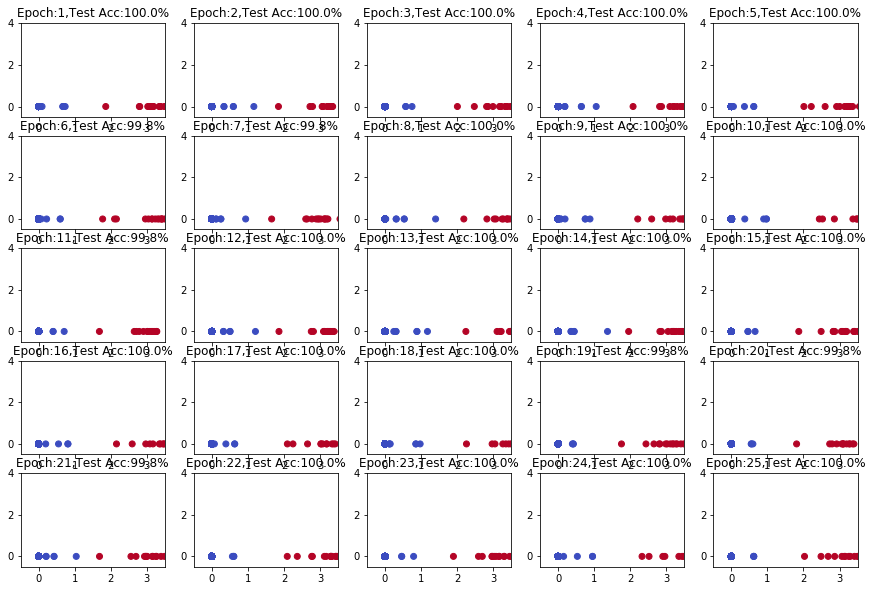

In [75]:
features_function=K.function([inp],[out])
plt.figure(figsize=(15,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    h=model6.fit(X_train,y_train, batch_size=16, verbose=0)
    test_accuracy=model6.evaluate(X_test,y_test)[1]
    features=features_function([X_test])[0]
    print(features)
    plt.scatter(features[:,0], features[:,1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5,3.5)
    plt.ylim(-0.5,4.0)
    plt.title('Epoch:{},Test Acc:{:3.1f}%'.format(i,test_accuracy*100))
plt.tight_layout